In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os
import csv
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
root_dir='../input/taiwanese-food-101/tw_food_101/tw_food_101'
train_dir = root_dir + '/train'
test_dir = root_dir + '/test'

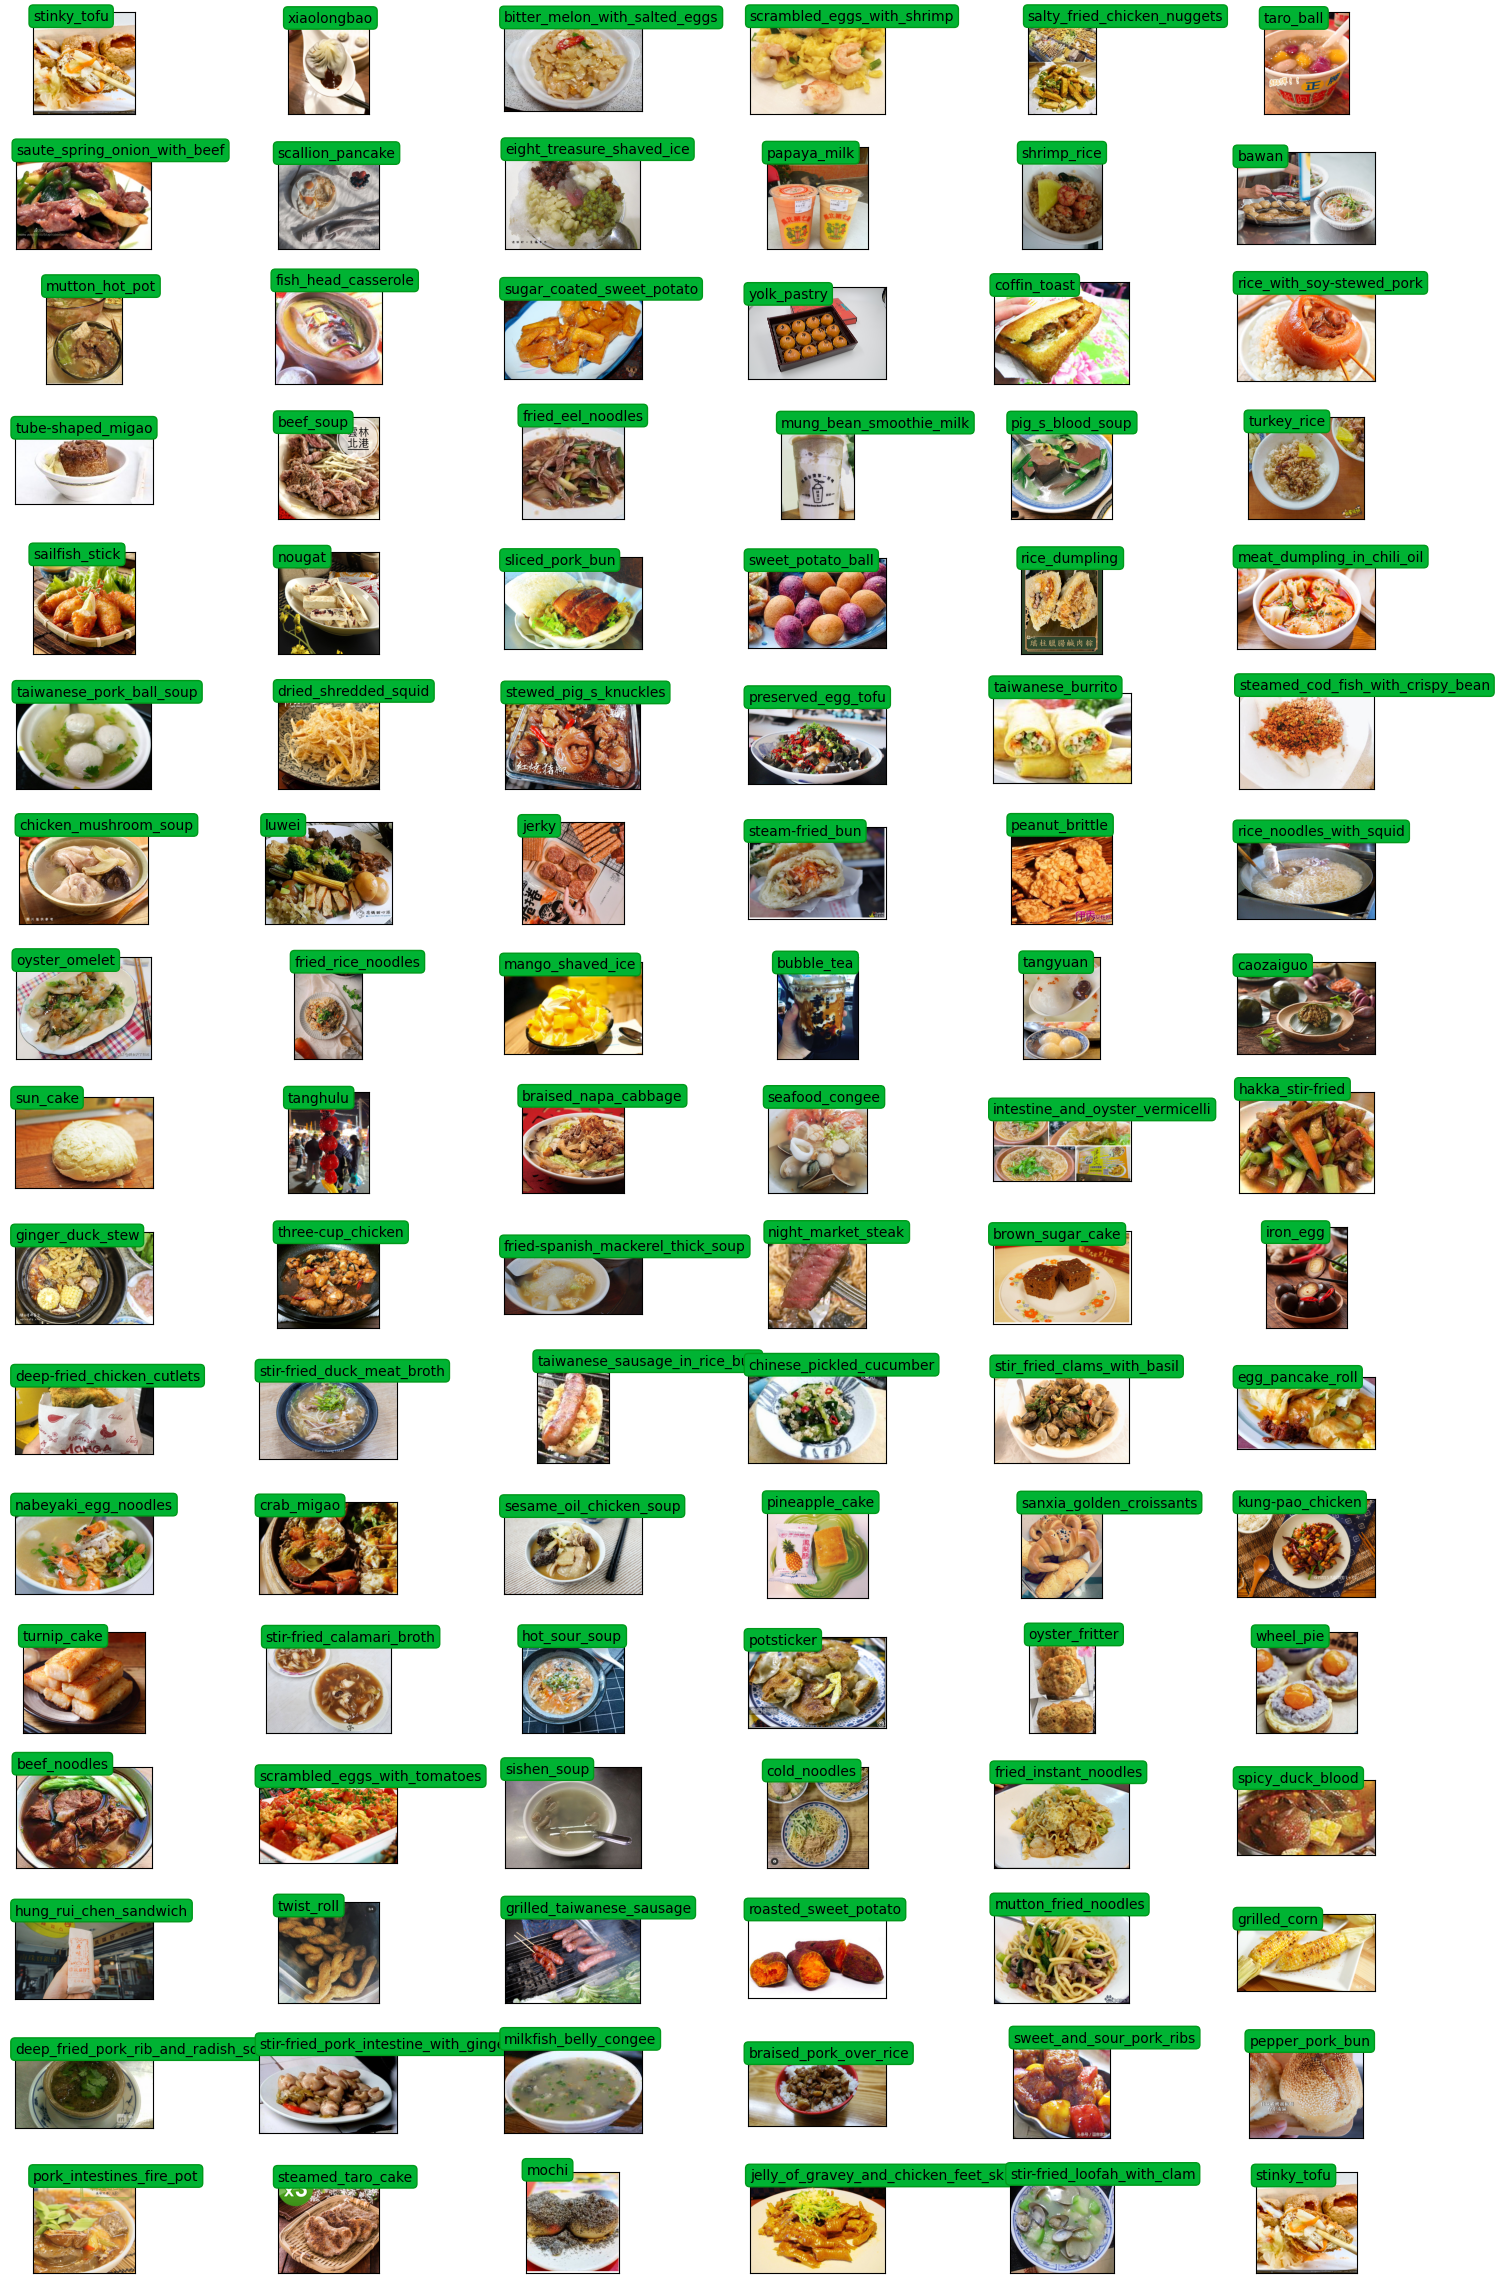

In [3]:
%matplotlib inline
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
food_dirs = os.listdir(train_dir)
for i in range(rows):
    for j in range(cols):
        food_dir = food_dirs[(i*cols + j)%101]
        all_files = os.listdir(os.path.join(train_dir, food_dir))
        img = plt.imread(os.path.join(train_dir, food_dir, all_files[3]))
        ax[i][j].imshow(img)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0, ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=(0, .6, .1), fc=(0, .7, .2)))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    color_mode = "rgb",
    batch_size= 128,
    class_mode='categorical',
    shuffle = True)

Found 20372 images belonging to 101 classes.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    color_mode = "rgb",
)

Found 20372 images belonging to 101 classes.


In [7]:
#base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
#base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
#base_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
#base_model = keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

94765736/94765736 [==============================] - 3s 0us/step


In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
#x = Dropout(.4)(x)

predictions = Dense(101, activation='softmax')(x)

model = Model(base_model.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']         

In [9]:
model.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
history = model.fit_generator(
      train_generator,
      epochs=50
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
 14/160 [=>............................] - ETA: 7:08 - loss: 8.6452 - accuracy: 0.0112

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:980: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 39/160 [======>.......................] - ETA: 6:48 - loss: 6.0723 - accuracy: 0.0120

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


160/160 [==============================] - 545s 3s/step - loss: 4.9228 - accuracy: 0.0208
Epoch 2/50
160/160 [==============================] - 367s 2s/step - loss: 3.8220 - accuracy: 0.0810
Epoch 3/50
160/160 [==============================] - 365s 2s/step - loss: 3.1982 - accuracy: 0.1784
Epoch 4/50
160/160 [==============================] - 366s 2s/step - loss: 2.6733 - accuracy: 0.2960
Epoch 5/50
160/160 [==============================] - 365s 2s/step - loss: 2.2879 - accuracy: 0.3827
Epoch 6/50
160/160 [==============================] - 368s 2s/step - loss: 2.0222 - accuracy: 0.4472
Epoch 7/50
160/160 [==============================] - 361s 2s/step - loss: 1.7910 - accuracy: 0.5020
Epoch 8/50
160/160 [==============================] - 369s 2s/step - loss: 1.6103 - accuracy: 0.5456
Epoch 9/50
160/160 [==============================] - 363s 2s/step - loss: 1.4784 - accuracy: 0.5833
Epoch 10/50
160/160 [==============================] - 363s 2s/step - loss: 1.3713 - accuracy: 0.6106


In [11]:
# Create {ID, filename} dictionary {'1269': '1269.jpg', '3863': '3863.jpg',.....}
test_dict = {}
for root, dirs, files in os.walk(root_dir + '/test'):
    for filename in files:
        test_id, file_ext = os.path.splitext(filename)
        test_dict[test_id] = filename

In [12]:
from PIL import Image
import numpy as np
from skimage import transform
def load_img(filename, target_w=150, target_h=150):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (target_w, target_h, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


In [13]:
# Read images in order and make predictions
results = []
for i in range(len(test_dict)):
    img = load_img(root_dir + '/test/' + test_dict[str(i)], 150, 150)
    ret = model.predict(img)
    results.append(np.argmax(ret))

1/1 [==============================] - 0s 25ms/step


In [14]:
# Print results in CSV format and upload to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')

In [15]:
# Download your results!
from IPython.display import FileLink
FileLink('pred_results.csv')

/kaggle/working/pred_results.csv

In [16]:
import pandas as pd

pred_results_ = pd.DataFrame(columns=['Id','Category'])
for i,item in enumerate(results):
    pred_results_.loc[len(pred_results_)] = [i,item]
pred_results_.to_csv('pred_results_.csv')